In [1]:
import numpy as np
import os 
from tqdm import tqdm

Retreive Images

In [2]:
DATA_PATH = ''

In [3]:
def imageFiles(DATA_PATH):
    IMAGE_FILES = list()
    for IMAGE in tqdm(os.listdir(DATA_PATH)):
        image_file = os.path.join(DATA_PATH, IMAGE)
        IMAGE_FILES.append(image_file)
    return IMAGE_FILES

In [5]:
IMAGE_FILES = imageFiles(DATA_PATH)

100%|██████████| 8091/8091 [00:00<00:00, 603985.15it/s]


In [9]:
IMAGE_FILES[:5]

['/Applications/ML projects/Success/Image Caption Generator/Dataset/Images/2387197355_237f6f41ee.jpg',
 '/Applications/ML projects/Success/Image Caption Generator/Dataset/Images/2609847254_0ec40c1cce.jpg',
 '/Applications/ML projects/Success/Image Caption Generator/Dataset/Images/2046222127_a6f300e202.jpg',
 '/Applications/ML projects/Success/Image Caption Generator/Dataset/Images/2853743795_e90ebc669d.jpg',
 '/Applications/ML projects/Success/Image Caption Generator/Dataset/Images/2696951725_e0ae54f6da.jpg']

Image Descriptors

In [21]:
import cv2
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

In [22]:
class ImageDescriptor:
    def __init__(self):
        self.base_model = VGG16(weights='imagenet')
        self.model = Model(inputs = self.base_model.input, outputs = self.base_model.get_layer('fc1').output)

    def descript(self, image):
        image = cv2.resize(image, (224, 224))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.expand_dims(image, axis = 0)
        image = preprocess_input(image)
        description = self.model.predict(image)[0]
        description = description / np.linalg.norm(description)
        return description

In [23]:
def imageDescriptions(imageDescriptor, IMAGE_FILES):
    descriptions = []
    for image_file in IMAGE_FILES:
        image = cv2.imread(image_file)
        description = imageDescriptor.descript(image)
        descriptions.append(description)
    return descriptions

In [24]:
imageDescriptor = ImageDescriptor()

2023-07-03 10:03:07.686759: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
IMAGE_DESCRIPTIONS = imageDescriptions(imageDescriptor, IMAGE_FILES)

1/1 [==============================] - 0s 170ms/step


Store Dataset

In [ ]:
import pickle

In [24]:
DATASET = list(zip(IMAGE_FILES, IMAGE_DESCRIPTIONS))

In [26]:
count = 0
path = ''
file_name = 'dataset - ' + str(count) + '.pkl'
dataset_file = os.path.join(path, file_name)
with open(dataset_file, 'wb') as file:
    pickle.dump(DATASET, file)

Query

In [25]:
import matplotlib.pyplot as plt
import pickle

In [26]:
def imageSearch(imageDescriptor, dataset_file, input_image_file, search_limit = 3):
    with open(dataset_file, 'rb') as file:
        dataset = pickle.load(file)

    image_files, image_descriptions = zip(*dataset)
    
    input_image = cv2.imread(input_image_file)
    query = imageDescriptor.descript(input_image)
    dists = np.linalg.norm(image_descriptions - query, axis = 1) 
    ids = np.argsort(dists)[1:search_limit + 1]

    images = list()
    for i in range(search_limit):
        image = cv2.imread(image_files[ids[i]])
        images.append(image)

    fig, axes = plt.subplots(search_limit + 1, 1, figsize=(6, 12))
    
    for i in range(search_limit + 1):
        if i == 0:
            axes[i].imshow(input_image)
            axes[i].axis('off')
            axes[i].set_title('Query')
        else:
            axes[i].imshow(images[i - 1])
            axes[i].axis('off')
            axes[i].set_title('Result - ' + str(i - 1))

    fig.subplots_adjust(hspace=0.2)
    plt.show()

In [27]:
dataset_file = ''

1/1 [==============================] - 0s 289ms/step


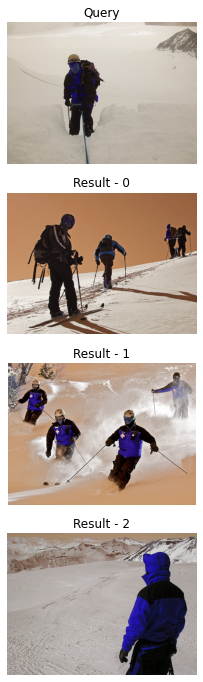

In [28]:
input_image_file = ''
imageSearch(imageDescriptor, dataset_file, input_image_file)

1/1 [==============================] - 0s 146ms/step


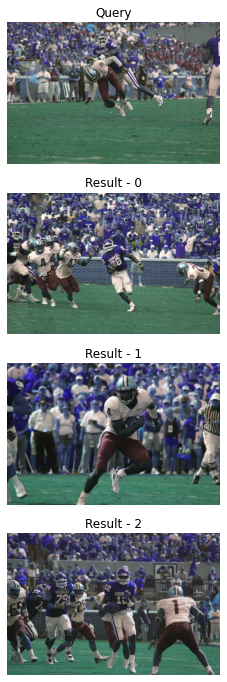

In [29]:
input_image_file = ''
imageSearch(imageDescriptor, dataset_file, input_image_file)

1/1 [==============================] - 0s 133ms/step


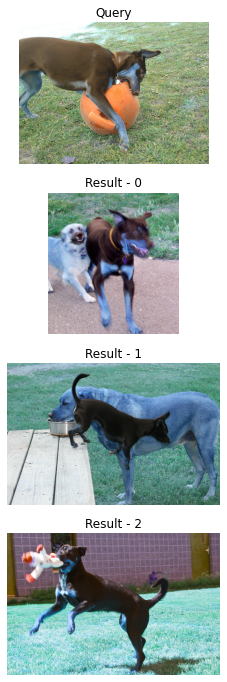

In [30]:
input_image_file = ''
imageSearch(imageDescriptor, dataset_file, input_image_file)